<h1>Deustch Algorithm


***

<h2>Table of Contents

<h2>Introduction

<h5> 

<h2>Problem Description

<h5>The Deutsch problem is a foundational problem in quantum computing that was introduced by David Deutsch in the 1980s. It serves as a key example of the capabilities of quantum algorithms and how sometimes, they can surpass classical algorithms.

The problem states, you are given a quantum black-box oracle function f: {0,1} -> {0,1}, which takes a single binary input bit and returns a single binary output bit. This oracle function is guaranteed to be either constant (i.e., it always returns 0 or always returns 1) or balanced (i.e., it returns 0 for one input and 1 for the other input).

Input: a funtion f : {0,1} -> {0,1}
Output: 0 if f is constant, 1 if f is balanced


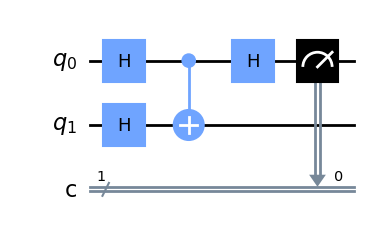

In [23]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

# Create a quantum circuit with two qubits and one classical register
qc = QuantumCircuit(2, 1, name='Deutsch Algorithm')

# Apply Hadamard gates to both qubits
qc.h(range(2))

# Implementation for a constant function (for example, always outputs 0)
# Simulate a constant function
# If f(x) is constant (always outputs 0), apply no operation or an identity gate

# Implementation for a balanced function (outputs different values for different inputs)
# For a balanced function, use a CNOT gate
# To simulate a balanced function for demonstration purposes:
qc.cx(0, 1)  # CNOT gate where qubit 0 is the control and qubit 1 is the target

# Apply Hadamard gate to the first qubit
qc.h(0)

# Measure the first qubit and store the result
qc.measure(0, 0)

# Draw the circuit
circuit_drawer(qc, output='mpl')


<h2>Constant and Balanced Functions

<h2>What is quantum computing?

<h2>Oracle

<h2>Bits and Qubits

<h2>Reversable Computing

<h2>Deutsch Algorithm

In [24]:
from qiskit import QuantumCircuit


def deutsch_function(case: int):
    """
    Generate a valid Deutsch function as a `QuantumCircuit`.
    """
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

deutsch_function(3).draw()

def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in Deutsch's algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

compile_circuit(
    deutsch_function(3)
).draw()



┌───┐      ░            ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■────────░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌───┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ║ 
c: 1/════════════════════════════════╩═
                                     0

<h2>References